In [35]:
import pandas as pd
import numpy as np
#Loading the dataset
df=pd.read_csv("climate_action_data.csv")
#Viewing basic structure
print(df.shape)
print(df.columns)
print(df.head())
#Checking the datatypes and null values
print(df.info())
#Checking summary of statistics
print(df.describe())

(913, 10)
Index(['Sensor_ID', 'Date', 'Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)',
       'Humidity(%)', 'Crop_Type', 'Fertilizer_Recommended(kg/ha)',
       'Irrigation_Recommended(mm)', 'Drone_Image_ID'],
      dtype='object')
  Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1  SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2  SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3  SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4  SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   

  Crop_Type Fertilizer_Recommended(kg/ha) Irrigation_Recommended(mm)  \
0  Tomatoes                          67.6                       26.6   
1     Wheat                         130.4                        8.3   
2  Tomatoes                          36.0                       29.4   
3   

In [36]:
#Data Cleaning
#Check number of duplicates
duplicates=df.duplicated()
num_duplicates=duplicates.sum()
print(f"Number of duplicate rows:{num_duplicates}")
#Remove duplicates
df=df.drop_duplicates()
duplicates1=df.duplicated()
num_duplicates1=duplicates.sum()
print(f"Number of duplicate rows after cleaning:{num_duplicates1}")

Number of duplicate rows:111
Number of duplicate rows after cleaning:111


In [38]:
#Find rowws with amy cell containing the string 'error'
print("Rows with 'error'")
error_rows=df[df.apply(lambda row:row.astype(str).str.contains('error',case=False,na=False).any(),axis=1)]
print(error_rows)
#Finding columns with any column containing'error'
print("Columns with 'error'")
error_columns = df.columns[df.apply(lambda col: col.astype(str).str.contains('error', case=False, na=False)).any()]
print(error_columns)
#Replacing error entries with NaN
df.replace('error',np.nan,inplace=True)
#Converting columns to numeric
numeric_cols = [
    'Soil_Moisture(%)',
    'Soil_pH',
    'Temperature(C)',
    'Humidity(%)',
    'Fertilizer_Recommended(kg/ha)',
    'Irrigation_Recommended(mm)'
]
for col in numeric_cols:
    df[col]=pd.to_numeric(df[col],errors='coerce')#Coercing errors to NaN
print(df[numeric_cols].dtypes)
print(df[numeric_cols].isnull().sum())

Rows with 'error'
Empty DataFrame
Columns: [Sensor_ID, Date, Soil_Moisture(%), Soil_pH, Temperature(C), Humidity(%), Crop_Type, Fertilizer_Recommended(kg/ha), Irrigation_Recommended(mm), Drone_Image_ID]
Index: []
Columns with 'error'
Index([], dtype='object')
Soil_Moisture(%)                 float64
Soil_pH                          float64
Temperature(C)                   float64
Humidity(%)                      float64
Fertilizer_Recommended(kg/ha)    float64
Irrigation_Recommended(mm)       float64
dtype: object
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
dtype: int64


In [39]:
#Handling Missing Values
#Checking for missing values
print(df.isnull().sum())
#Hanling missing values
# Filling remaining NaNs in numerical columns with median
for col in numeric_cols:
    if df[col].isnull().sum()>0:
        df[col].fillna(df[col].median(),inplace=True)
#Filling remaining Nans in categorical columns with mode
categorical_cols=['crop_type', 'irrigation_type']
for col in categorical_cols:
    if col in df.columns and df[col].isnull().sum()>0:
        df[col].fillna(df[col].mode()[0],inplace=True)
        

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64


C:\Users\jassi\AppData\Local\Temp\ipykernel_9960\2916915390.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace=True)


In [40]:
#Get statistics
print(df.describe(include='all'))

       Sensor_ID        Date  Soil_Moisture(%)     Soil_pH  Temperature(C)  \
count        802         798        802.000000  802.000000      802.000000   
unique       800         798               NaN         NaN             NaN   
top     SEN-1449  2025-01-01               NaN         NaN             NaN   
freq           2           1               NaN         NaN             NaN   
mean         NaN         NaN         44.767756    6.248865       26.461471   
std          NaN         NaN         20.460731    1.021573        4.863302   
min          NaN         NaN         10.350000    4.520000       18.000000   
25%          NaN         NaN         26.947500    5.330000       22.300000   
50%          NaN         NaN         45.410000    6.260000       26.600000   
75%          NaN         NaN         62.555000    7.080000       30.600000   
max          NaN         NaN         79.980000    8.000000       35.000000   

        Humidity(%) Crop_Type  Fertilizer_Recommended(kg/ha)  \

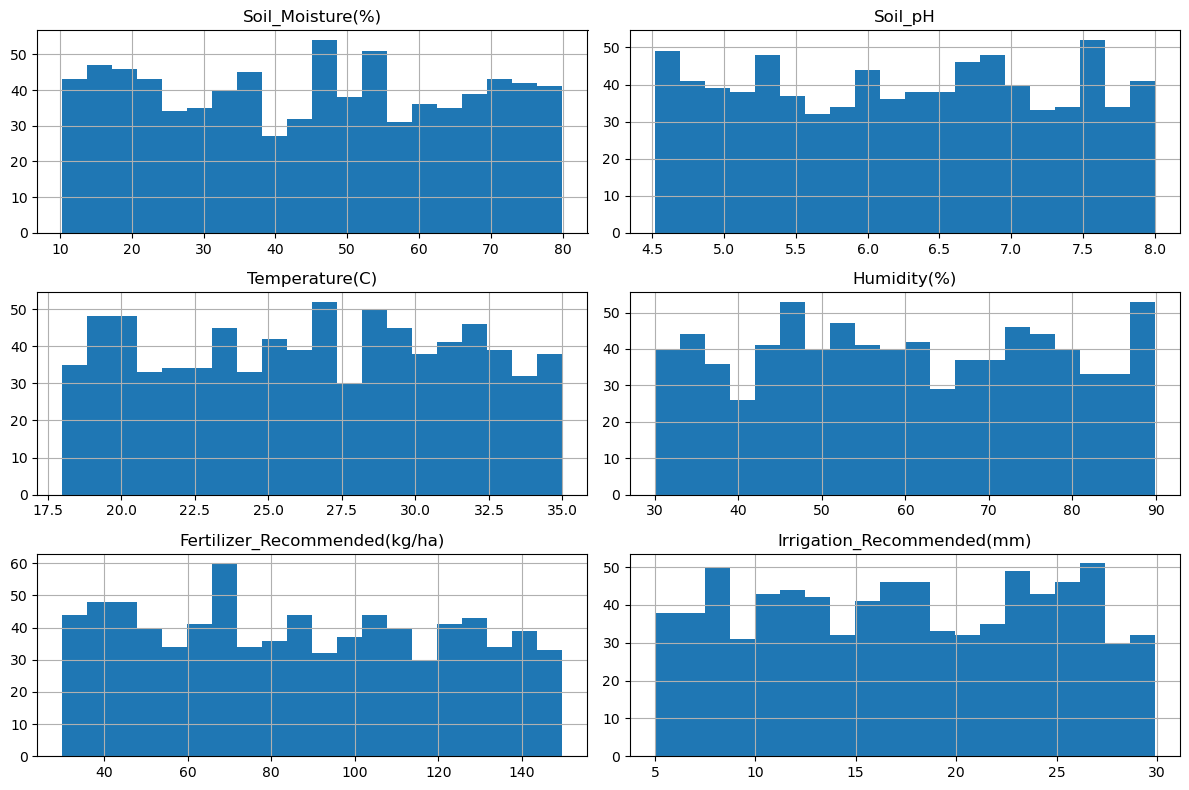

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
#Histogram
df[numeric_cols].hist(bins=20,figsize=(12,8))
plt.tight_layout()
plt.show()

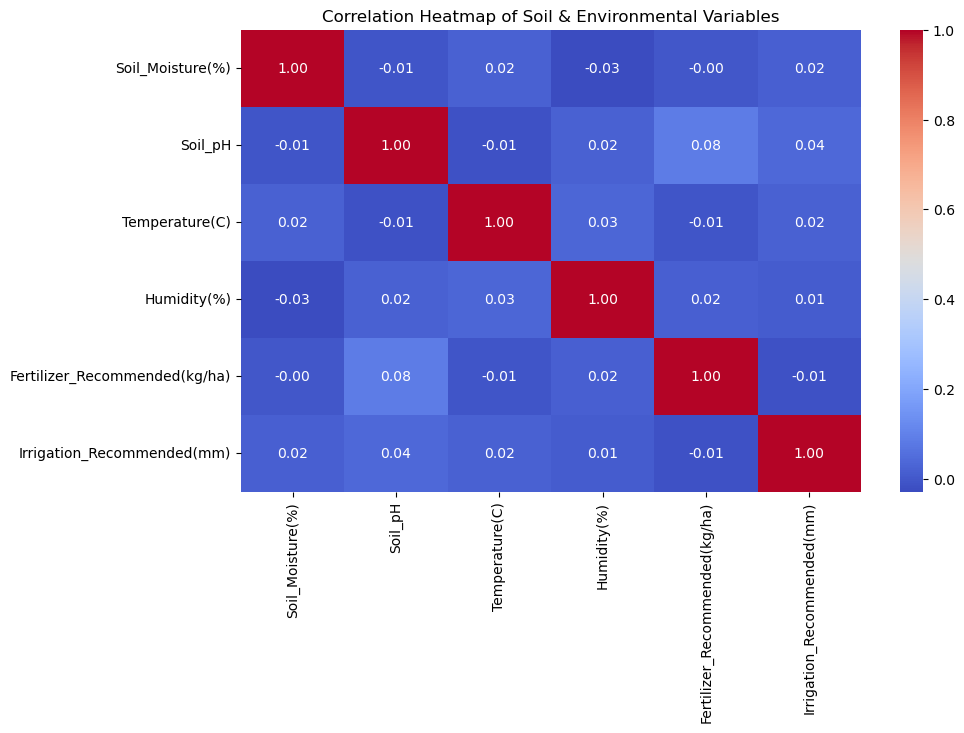

In [42]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Heatmap of Soil & Environmental Variables")
plt.show()

In [46]:
#insights and recommendations
# Correlation with fertilizer quantity
numeric_df = df.select_dtypes(include=[np.number])
fert_corr = numeric_df.corr()['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)

print("Correlation with Fertilizer_Recommended(kg/ha):\n")
print(fert_corr)


Correlation with Fertilizer_Recommended(kg/ha):

Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.083672
Humidity(%)                      0.015307
Soil_Moisture(%)                -0.002767
Temperature(C)                  -0.007215
Irrigation_Recommended(mm)      -0.014122
Name: Fertilizer_Recommended(kg/ha), dtype: float64


In [ ]:

# Group by crop and find average soil moisture
moisture_by_crop = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
print("Average Soil Moisture by Crop Type:\n")
print(moisture_by_crop)



Average Soil Moisture by Crop Type:

Crop_Type
Wheat       47.185349
Maize       44.955032
Beans       44.395855
Tomatoes    43.819286
Lettuce     42.986358
Name: Soil_Moisture(%), dtype: float64


In [49]:
# Find crops with average temperature > 30°C
hot_crops = df.groupby('Crop_Type')['Temperature(C)'].mean()
hot_crops = hot_crops[hot_crops > 30]

# Display results
print(" Crops with Avg Temperature > 30°C:\n")
print(hot_crops)

# Irrigation suggestion
print("\n Suggestion: Increase irrigation frequency or volume for these crops to reduce heat stress and evapotranspiration loss.")



 Crops with Avg Temperature > 30°C:

Series([], Name: Temperature(C), dtype: float64)

 Suggestion: Increase irrigation frequency or volume for these crops to reduce heat stress and evapotranspiration loss.


In [50]:
# Save cleaned dataset
df.to_csv("cleaned_precision_agriculture_data.csv", index=False)


In [ ]:
#Summary of Recommendations
# High Influence Variables: Based on correlation, variables like soil_moisture, soil_ph, and temperature may significantly affect fertilizer needs.

# Crop with Highest Soil Moisture: Likely a moisture-loving crop (e.g., rice).

# High-Temperature Crops: Require adjusted irrigation strategies to avoid water stress.